### Setup

In [114]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("fmena14/volcanoesvenus")

print("Path to dataset files:", path)

Path to dataset files: /Users/gabrieledurante/.cache/kagglehub/datasets/fmena14/volcanoesvenus/versions/1


In [115]:
import os

files = os.listdir(path)
print(files)

['Volcanoes_train', 'Volcanoes_test']


### Data Preparation

In [116]:
import numpy as np
import pandas as pd

import os
print(os.listdir(path))

X_train = pd.read_csv(os.path.join(path, 'volcanoes_train', 'train_images.csv'))
y_train = pd.read_csv(os.path.join(path, 'volcanoes_train', 'train_labels.csv'))
X_test = pd.read_csv(os.path.join(path, 'volcanoes_test', 'test_images.csv'))
y_test = pd.read_csv(os.path.join(path, 'volcanoes_test', 'test_labels.csv'))

['Volcanoes_train', 'Volcanoes_test']


In [117]:
print(X_train.head())
print(y_train.head())

    95  101   99  103  95.1   86   96   89   70  104  ...  111.214  107.329  \
0   91   92   91   89    92   93   96  101  107  104  ...      103       92   
1   87   70   72   74    84   78   93  104  106  106  ...       84       71   
2    0    0    0    0     0    0    0    0    0    0  ...       94       81   
3  114  118  124  119    95  118  105  116  123  112  ...      116      113   
4   79   95   90   82    73   74   77   75   82   87  ...       90       80   

   92.354  89.258  103.379  99.414  117.112  116.103  118.82  96.423  
0      93      95       98     105      104      100      90      81  
1      95     102       94      80       91       80      84      90  
2      89      84       80      90       92       80      88      96  
3     102      93      109     104      106      117     111     115  
4      79      78       65      71       62       97      89      73  

[5 rows x 12100 columns]
   Volcano?  Type  Radius  Number Volcanoes
0         1   3.0   17.46    

In [118]:
print("X_train shape:\t",X_train.shape,"\ny_train shape:\t",y_train.shape,"\nX_test shape:\t",X_test.shape,"\ny_test shape:\t",y_test.shape)

X_train shape:	 (6999, 12100) 
y_train shape:	 (7000, 4) 
X_test shape:	 (2733, 12100) 
y_test shape:	 (2734, 4)


In [119]:
def XFix(X):
    X.loc[-1] = X.columns.values.astype(float).astype(int)  # adding column names as a new row
    X.index = X.index + 1  # shifting index
    X.sort_index(inplace=True)  # sorting the index

XFix(X_train)
XFix(X_test)

In [120]:
print("X_train shape:\t",X_train.shape,"\ny_train shape:\t",y_train.shape,"\nX_test shape:\t",X_test.shape,"\ny_test shape:\t",y_test.shape)

X_train shape:	 (7000, 12100) 
y_train shape:	 (7000, 4) 
X_test shape:	 (2734, 12100) 
y_test shape:	 (2734, 4)


### Some statistics

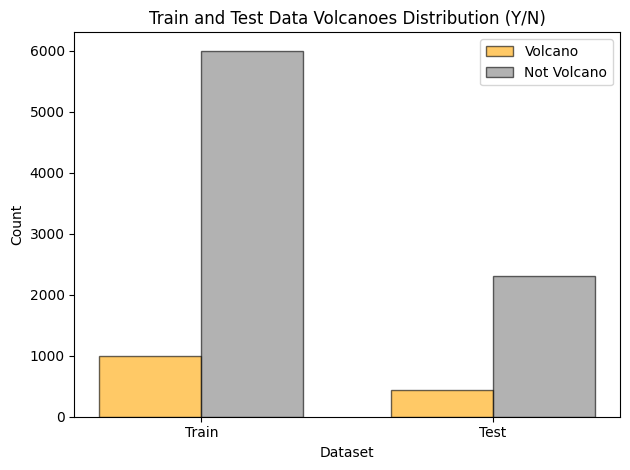

In [121]:
import matplotlib.pyplot as plt
import numpy as np

y_trainVolcanoCount = y_train[y_train["Volcano?"] == 1].shape[0]
y_testVolcanoCount = y_test[y_test["Volcano?"] == 1].shape[0]

y_trainNotVolcanoCount = y_train[y_train["Volcano?"] == 0].shape[0]
y_testNotVolcanoCount = y_test[y_test["Volcano?"] == 0].shape[0]

x = ['Train', 'Test']
y_volcano = [y_trainVolcanoCount, y_testVolcanoCount]
y_not_volcano = [y_trainNotVolcanoCount, y_testNotVolcanoCount]

bar_width = 0.35
x_positions = np.arange(len(x))

plt.bar(x_positions - bar_width / 2, y_volcano, width=bar_width, label='Volcano', color='orange', edgecolor='black', alpha=0.6)
plt.bar(x_positions + bar_width / 2, y_not_volcano, width=bar_width, label='Not Volcano', color='gray', edgecolor='black', alpha=0.6)

# plot
plt.xticks(x_positions, x)
plt.xlabel('Dataset')
plt.ylabel('Count')
plt.title('Train and Test Data Volcanoes Distribution (Y/N)')
plt.legend()
plt.tight_layout()
plt.show()

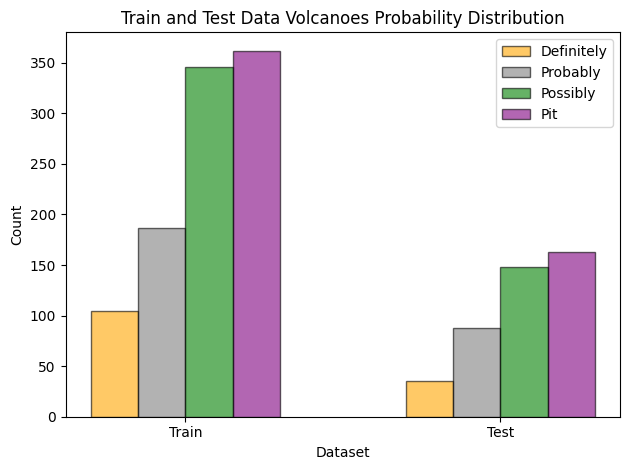

In [122]:
y_trainTypeDefinitelyCount = y_train[y_train["Type"] == 1].shape[0]
y_testTypeDefinitelyCount = y_test[y_test["Type"] == 1].shape[0]

y_trainTypeProbablyCount = y_train[y_train["Type"] == 2].shape[0]
y_testTypeProbablyCount = y_test[y_test["Type"] == 2].shape[0]

y_trainTypePossiblyCount = y_train[y_train["Type"] == 3].shape[0]
y_testTypePossiblyCount = y_test[y_test["Type"] == 3].shape[0]

y_trainTypePitCount = y_train[y_train["Type"] == 4].shape[0]
y_testTypePitCount = y_test[y_test["Type"] == 4].shape[0]

x = ['Train', 'Test']
y1 = [y_trainTypeDefinitelyCount, y_testTypeDefinitelyCount]
y2 = [y_trainTypeProbablyCount, y_testTypeProbablyCount]
y3 = [y_trainTypePossiblyCount, y_testTypePossiblyCount]
y4 = [y_trainTypePitCount, y_testTypePitCount]


bar_width = 0.15
x_positions = np.arange(len(x))

plt.bar(x_positions - 1.5 * bar_width, y1, width=bar_width, label='Definitely', color='orange', edgecolor='black', alpha=0.6)
plt.bar(x_positions - 0.5 * bar_width, y2, width=bar_width, label='Probably', color='gray', edgecolor='black', alpha=0.6)
plt.bar(x_positions + 0.5 * bar_width, y3, width=bar_width, label='Possibly', color='green', edgecolor='black', alpha=0.6)
plt.bar(x_positions + 1.5 * bar_width, y4, width=bar_width, label='Pit', color='purple', edgecolor='black', alpha=0.6)

# plot
plt.xticks(x_positions, x)
plt.xlabel('Dataset')
plt.ylabel('Count')
plt.title('Train and Test Data Volcanoes Probability Distribution')
plt.legend()
plt.tight_layout()
plt.show()

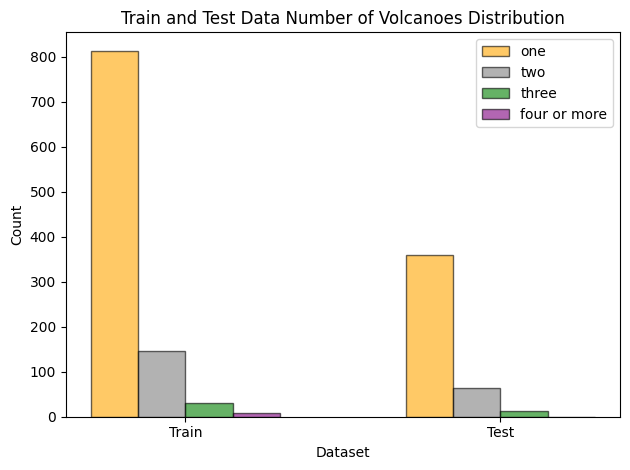

In [123]:
y_trainNumberVolcanoesOnelyCount = y_train[y_train["Number Volcanoes"] == 1].shape[0]
y_testNumberVolcanoesOneCount = y_test[y_test["Number Volcanoes"] == 1].shape[0]

y_trainNumberVolcanoesTwoCount = y_train[y_train["Number Volcanoes"] == 2].shape[0]
y_testNumberVolcanoesTwoCount = y_test[y_test["Number Volcanoes"] == 2].shape[0]

y_trainNumberVolcanoesThreeCount = y_train[y_train["Number Volcanoes"] == 3].shape[0]
y_testNumberVolcanoesThreeCount = y_test[y_test["Number Volcanoes"] == 3].shape[0]

y_trainNumberVolcanoesFourCount = y_train[y_train["Number Volcanoes"] >= 4].shape[0]
y_testNumberVolcanoesFourCount = y_test[y_test["Number Volcanoes"] >= 4].shape[0]

x = ['Train', 'Test']
y1 = [y_trainNumberVolcanoesOnelyCount, y_testNumberVolcanoesOneCount]
y2 = [y_trainNumberVolcanoesTwoCount, y_testNumberVolcanoesTwoCount]
y3 = [y_trainNumberVolcanoesThreeCount, y_testNumberVolcanoesThreeCount]
y4 = [y_trainNumberVolcanoesFourCount, y_testNumberVolcanoesFourCount]

bar_width = 0.15
x_positions = np.arange(len(x))

plt.bar(x_positions - 1.5 * bar_width, y1, width=bar_width, label='one', color='orange', edgecolor='black', alpha=0.6)
plt.bar(x_positions - 0.5 * bar_width, y2, width=bar_width, label='two', color='gray', edgecolor='black', alpha=0.6)
plt.bar(x_positions + 0.5 * bar_width, y3, width=bar_width, label='three', color='green', edgecolor='black', alpha=0.6)
plt.bar(x_positions + 1.5 * bar_width, y4, width=bar_width, label='four or more', color='purple', edgecolor='black', alpha=0.6)

# plot
plt.xticks(x_positions, x)
plt.xlabel('Dataset')
plt.ylabel('Count')
plt.title('Train and Test Data Number of Volcanoes Distribution')
plt.legend()
plt.tight_layout()
plt.show()

### Single visualization

In [124]:
#Reshape 
X_test_vis = X_test.values.reshape((X_test.shape[0],1,110,110)) 
X_train_vis = X_train.values.reshape((X_train.shape[0],1,110,110))
print(X_train_vis.shape)

(7000, 1, 110, 110)


In [125]:
#preprocess
X_test_vis = X_test_vis/255.0
X_train_vis = X_train_vis/255.0
#Transpose to tensorflow dimension.
X_test_vis = X_test_vis.transpose([0,2, 3, 1])
X_train_vis = X_train_vis.transpose([0,2, 3, 1])
print(X_train_vis.shape)

(7000, 110, 110, 1)


In [126]:
import matplotlib.pyplot as plt

label_names = ["No","Yes"]
def visualize(X,Y):
    n = np.random.randint(0,X.shape[0])
    aux = X[n]
    
    f,ax = plt.subplots(1,figsize=(8,3))
    ax.set_title("Ground Truth of Volcano?: %s "%(label_names[Y["Volcano?"][n]]))

    ax.imshow(aux[:,:,0],cmap='copper') #the one channel
    ax.set_yticks([])
    ax.set_xticks([])
    plt.show()
    print("Detail:",Y.loc[n,:])

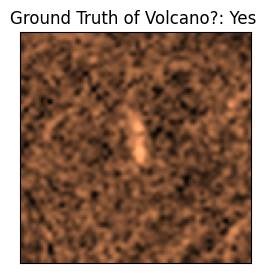

Detail: Volcano?            1.00
Type                4.00
Radius              4.24
Number Volcanoes    1.00
Name: 5020, dtype: float64


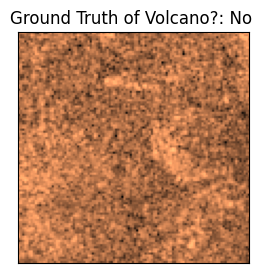

Detail: Volcano?            0.0
Type                NaN
Radius              NaN
Number Volcanoes    NaN
Name: 4781, dtype: float64


In [127]:
visualize(X_train_vis, y_train)
visualize(X_train_vis, y_train)

### Visualization

In [128]:
import warnings

y_train_copy = y_train.copy(deep=True)
X_train_copy = X_train.copy(deep=True)

X_train_copy = np.resize(X_train_copy, (7000, 110, 110))

y_train_copy.loc[y_train_copy["Type"] == 1, 'Type'] = "Definitely Volcano"
y_train_copy.loc[y_train_copy["Type"] == 2, 'Type'] = "Probably Volcano"
y_train_copy.loc[y_train_copy["Type"] == 3, 'Type'] = "Possibly Volcano"
y_train_copy.loc[y_train_copy["Type"] == 4, 'Type'] = "Only Pit is Visible"

y_train_copy.loc[y_train_copy["Volcano?"] == 0, 'Volcano?'] = "Not Volcano"
y_train_copy.loc[y_train_copy["Volcano?"] == 1, 'Volcano?'] = "Volcano"

y_train_copy.loc[y_train_copy["Number Volcanoes"] == 1, 'Number Volcanoes'] = "One Volcano"
y_train_copy.loc[y_train_copy["Number Volcanoes"] == 2, 'Number Volcanoes'] = "Two Volcano"
y_train_copy.loc[y_train_copy["Number Volcanoes"] == 3, 'Number Volcanoes'] = "Three or More Volcano"
y_train_copy.loc[y_train_copy["Number Volcanoes"] == 4, 'Number Volcanoes'] = "Three or More Volcano"
y_train_copy.loc[y_train_copy["Number Volcanoes"] == 5, 'Number Volcanoes'] = "Three or More Volcano"

/var/folders/mh/vygn38qn06z8b_ms648150t80000gn/T/ipykernel_9785/1980578206.py:8: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'Definitely Volcano' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  y_train_copy.loc[y_train_copy["Type"] == 1, 'Type'] = "Definitely Volcano"
/var/folders/mh/vygn38qn06z8b_ms648150t80000gn/T/ipykernel_9785/1980578206.py:13: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'Not Volcano' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  y_train_copy.loc[y_train_copy["Volcano?"] == 0, 'Volcano?'] = "Not Volcano"
/var/folders/mh/vygn38qn06z8b_ms648150t80000gn/T/ipykernel_9785/1980578206.py:16: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'One 

In [129]:
from matplotlib import pyplot as plt

def draw_images(feature, cmap="copper"):
    featureTypes = (y_train_copy.groupby([feature])[feature].nunique()).index
    n_features = min(len(featureTypes), 3)  # Adjust dynamically for up to 3 feature types
    f, ax = plt.subplots(1, n_features, figsize=(4 * n_features, 6))  # Dynamic figsize based on the number of plots
    
    if n_features == 1:  # If only one feature type, `ax` is not iterable
        ax = [ax]
    
    for i, typ in enumerate(featureTypes[:n_features]):  # Loop over available feature types
        sample = y_train_copy[y_train_copy[feature] == typ].sample(1)  # One sample per feature type
        imageIndex = sample.iloc[0].name
        image = X_train_copy[imageIndex]
        ax[i].imshow(image, resample=True, cmap=cmap)
        ax[i].set_title(typ, fontsize=13)
        ax[i].axis("off")  # Turn off axes for better aesthetics
    
    plt.tight_layout()
    plt.show()


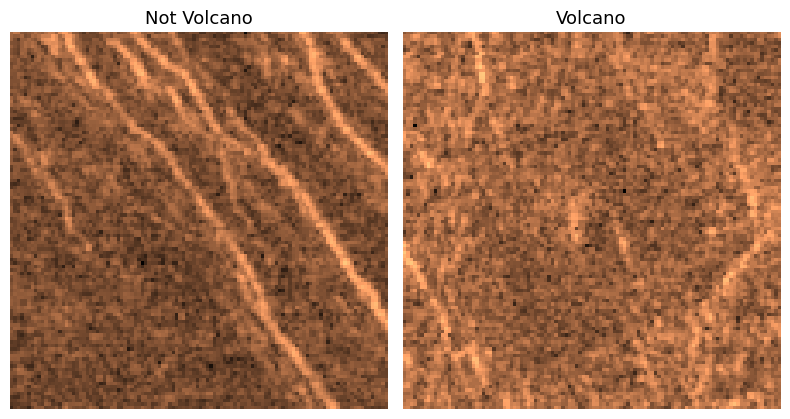

In [130]:
draw_images("Volcano?")

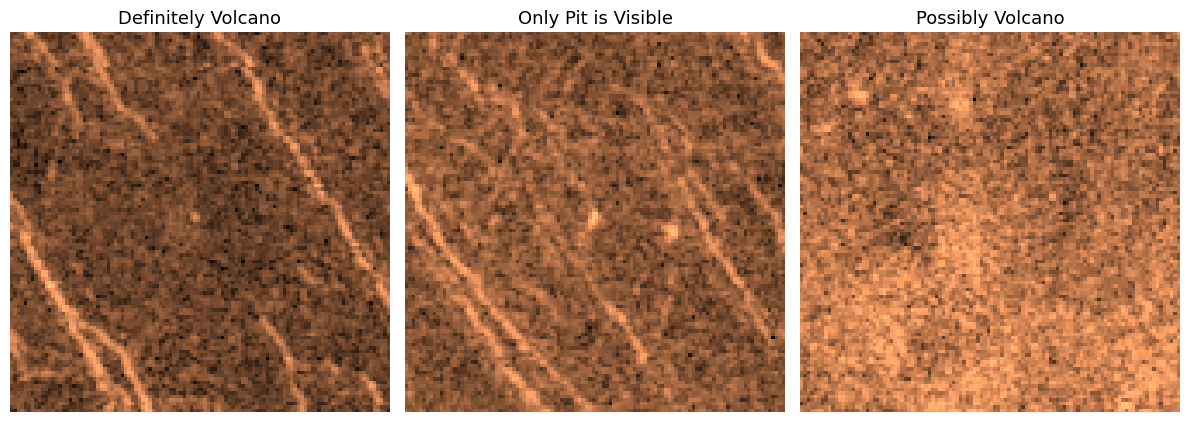

In [131]:
draw_images("Type")

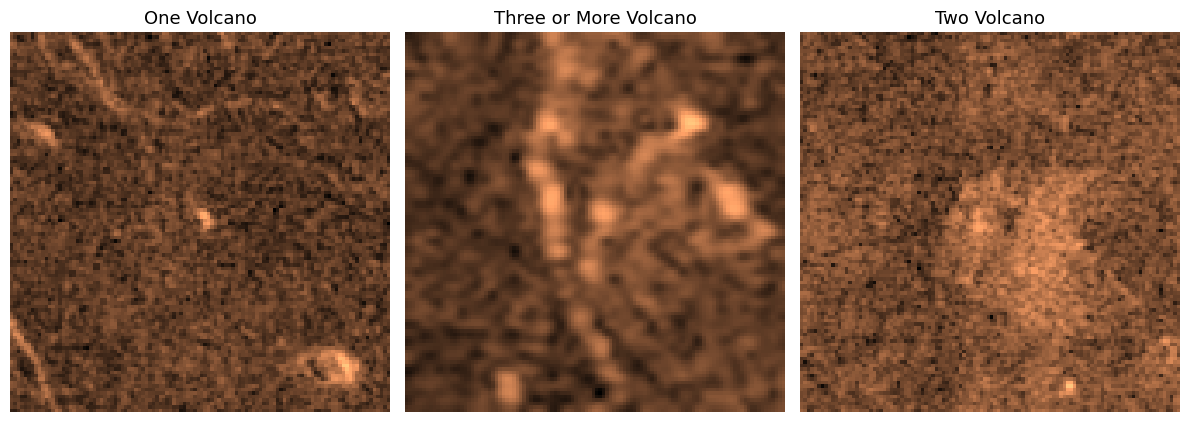

In [132]:
draw_images("Number Volcanoes")

### CNN models

In [133]:
from sklearn.model_selection import train_test_split
# we want to implement the valuation split so we divide the test set by 50%

X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.5, random_state=2024)
print("%70\tX_train ->",X_train.shape,"\n\ty_train ->",y_train.shape,
      "\n\n%15\tX_test ->",X_test.shape,"\n\ty_test ->",y_test.shape,
      "\n\n%15\tX_val ->",X_val.shape,"\n\ty_val ->",y_val.shape)

%70	X_train -> (7000, 12100) 
	y_train -> (7000, 4) 

%15	X_test -> (1367, 12100) 
	y_test -> (1367, 4) 

%15	X_val -> (1367, 12100) 
	y_val -> (1367, 4)


In [134]:
# resizing for keras, we want to specify the color channel
X_test = np.resize(X_test, (1367, 110, 110, 1)) # 110 x 110 x 1 = 12100
X_train = np.resize(X_train, (7000, 110, 110, 1))
X_val = np.resize(X_val, (1367, 110, 110, 1))

print("%70\tX_train ->",X_train.shape,"\n\ty_train ->",y_train.shape,
      "\n\n%15\tX_test ->",X_test.shape,"\n\ty_test ->",y_test.shape,
      "\n\n%15\tX_val ->",X_val.shape,"\n\ty_val ->",y_val.shape)

%70	X_train -> (7000, 110, 110, 1) 
	y_train -> (7000, 4) 

%15	X_test -> (1367, 110, 110, 1) 
	y_test -> (1367, 4) 

%15	X_val -> (1367, 110, 110, 1) 
	y_val -> (1367, 4)


In [135]:
# focus only to this variable (Y/n), binary classification
y_train = y_train["Volcano?"]
y_test = y_test["Volcano?"]
y_val = y_val["Volcano?"]

In [136]:
# we need to normalize our pixels from 0-255 to 0-1. But why we do this?
# The goal of normalization is to change the values of numeric columns in the dataset to use a common scale,
# without distorting differences in the ranges of values or losing information.
X_train = X_train / 255.0
X_test = X_test / 255.0
X_val = X_val / 255.0

In [137]:
# pip install --upgrade tensorflow keras

In [138]:
from tensorflow.keras.utils import to_categorical # convert to one-hot-encoding
y_train = to_categorical(y_train, num_classes = 2)
y_test = to_categorical(y_test, num_classes = 2)
y_val = to_categorical(y_val, num_classes = 2)

In [139]:
from keras import optimizers
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten, MaxPool2D, Dropout
from keras.optimizers import Adam

modelA = Sequential()
modelA.add(Conv2D(filters = 8, kernel_size = (5,5), activation ='relu', input_shape = (110,110,1)))
modelA.add(MaxPool2D(pool_size=(2,2)))
modelA.add(Conv2D(filters = 16, kernel_size = (3,3), activation ='relu'))
modelA.add(MaxPool2D(pool_size=(2,2)))
modelA.add(Flatten())
modelA.add(Dense(y_train.shape[1], activation = "sigmoid"))

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [140]:
# view the model in HTML version, in paper use this PNG version
modelA.save("Project3/netron_graphs/modelA.h5")

# -> console: netron modelA.h5 

In [141]:
# from tensorflow.keras.utils import plot_model

# plot_model(
#     modelA,
#     to_file='modelA_plot.png',
#     show_shapes=True,                 # Mostra le forme degli input/output
#     show_layer_names=True,            # Mostra i nomi dei layer
#     dpi=80,                          # Aumenta i punti per pollice (immagine più compatta)
#     rankdir='TB'                      # Direzione dall'alto al basso
# )

In [142]:
modelA.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 106, 106, 8)    │           208 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 53, 53, 8)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 51, 51, 16)     │         1,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 25, 25, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 10000)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 2)              │        20,002 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 21,378 (83.51 KB)

 Trainable params: 21,378 (83.51 KB)

 Non-trainable params: 0 (0.00 B)

In [143]:
modelA.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

### Training

Model A

In [144]:
modelA_trained = modelA.fit(X_train, y_train, batch_size=64, epochs = 10, validation_data = (X_val,y_val))

Epoch 1/10
110/110 ━━━━━━━━━━━━━━━━━━━━ 18s 156ms/step - accuracy: 0.8618 - loss: 0.4389 - val_accuracy: 0.8420 - val_loss: 0.4292
Epoch 2/10
110/110 ━━━━━━━━━━━━━━━━━━━━ 17s 153ms/step - accuracy: 0.8623 - loss: 0.3917 - val_accuracy: 0.8420 - val_loss: 0.4161
Epoch 3/10
110/110 ━━━━━━━━━━━━━━━━━━━━ 20s 183ms/step - accuracy: 0.8560 - loss: 0.3732 - val_accuracy: 0.7030 - val_loss: 0.5929
Epoch 4/10
110/110 ━━━━━━━━━━━━━━━━━━━━ 23s 203ms/step - accuracy: 0.8684 - loss: 0.3281 - val_accuracy: 0.9203 - val_loss: 0.2591
Epoch 5/10
110/110 ━━━━━━━━━━━━━━━━━━━━ 17s 157ms/step - accuracy: 0.9191 - loss: 0.2159 - val_accuracy: 0.9305 - val_loss: 0.2033
Epoch 6/10
110/110 ━━━━━━━━━━━━━━━━━━━━ 17s 158ms/step - accuracy: 0.9379 - loss: 0.1779 - val_accuracy: 0.9203 - val_loss: 0.2139
Epoch 7/10
110/110 ━━━━━━━━━━━━━━━━━━━━ 19s 168ms/step - accuracy: 0.9423 - loss: 0.1594 - val_accuracy: 0.9349 - val_loss: 0.1853
Epoch 8/10
110/110 ━━━━━━━━━━━━━━━━━━━━ 24s 214ms/step - accuracy: 0.9492 - loss: 0

In [145]:
print(modelA.history.history.keys())

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


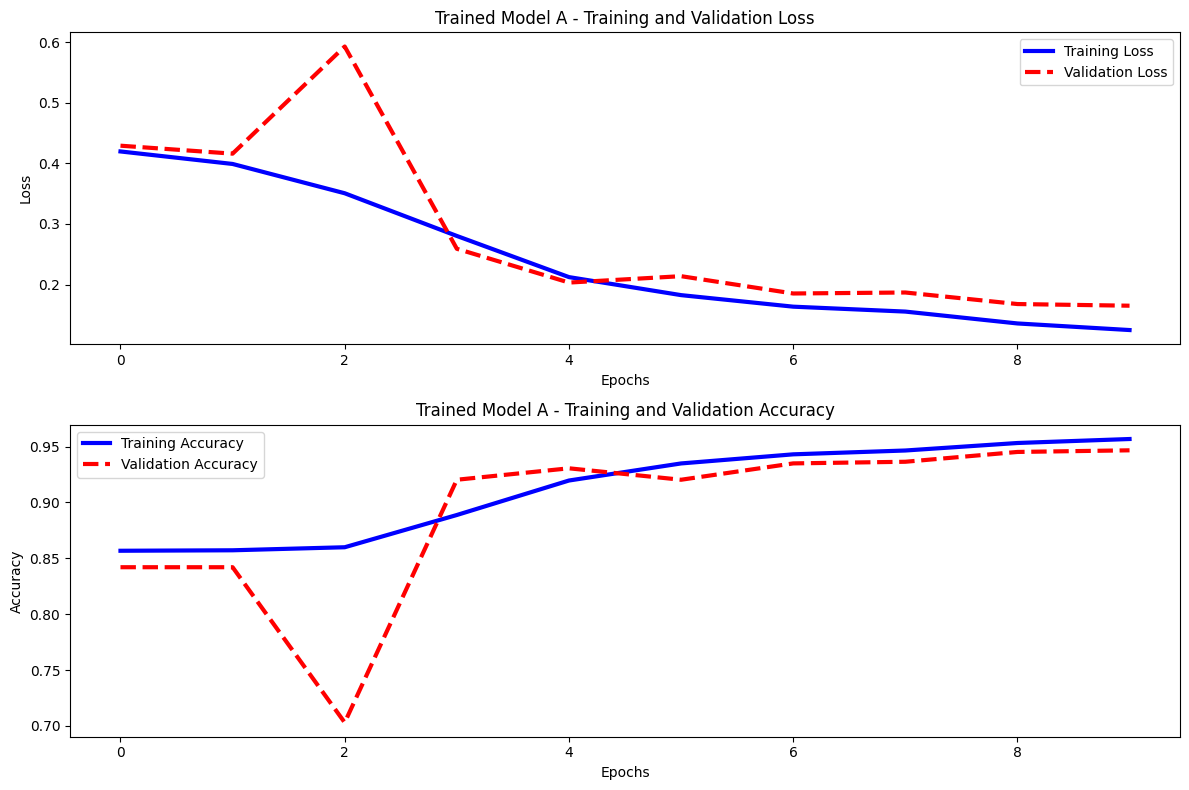

In [146]:
import matplotlib.pyplot as plt

def training_results_graph(model, model_code):
    epochs = model.epoch
    loss = model.history['loss']
    val_loss = model.history['val_loss']
    accuracy = model.history['accuracy']
    val_accuracy = model.history['val_accuracy']

    # Create the plots
    plt.figure(figsize=(12, 8))

    # Loss plot
    plt.subplot(2, 1, 1)
    plt.plot(epochs, loss, label='Training Loss', color='blue', linewidth=3)
    plt.plot(epochs, val_loss, label='Validation Loss', color='red', linestyle='--', linewidth=3)
    plt.title(f'Trained Model {model_code} - Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(False)

    # Accuracy plot
    plt.subplot(2, 1, 2)
    plt.plot(epochs, accuracy, label='Training Accuracy', color='blue', linewidth=3)
    plt.plot(epochs, val_accuracy, label='Validation Accuracy', color='red', linestyle='--', linewidth=3)
    plt.title(f'Trained Model {model_code} - Training and Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid(False)

    plt.tight_layout()
    plt.show()

# Example usage (requires modelA_trained to be defined):
training_results_graph(modelA_trained, 'A')

In [147]:
scoreA = modelA.evaluate(X_test, y_test)
print('Test Loss ->', scoreA[0])
print('Test Accuracy ->', scoreA[1])

43/43 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.9466 - loss: 0.1467
Test Loss -> 0.1580822765827179
Test Accuracy -> 0.9422092437744141


Model B

Add dropouts and data cleaning. 
We have some blank/black images in our data. We try to get rid of them to make our model better.
We can detect the images which are completely black however the detection of the partly corrupted images will be more difficult.

Find black pixel series in all images and delete them if the series' length passed the 10 pixels.
We need to flatten(resize 1D array) back our images then sum every 10 pixels.
If sum equals to 0 there is corruption in the image.
There is an important problem here If the image started to corrupt from the upper side my perfect :/ 
method will not work (Please comment if you have better)
because every 110th pixel will be black in this situation. 
So I use range's third parameter and jump every 119 pixel in loop

```
range([start], stop[, step])
    *start: Starting number of the sequence.
    *stop: Generate numbers up to, but not including this number.
    *step: Difference between each number in the sequence.
```

In [148]:
def corruptedImages(data):
    corruptedImagesIndex = []
    for index, image in enumerate(np.resize(data, (data.shape[0], 12100))): # resize (7000, 110, 110, 1) to (7000,12100)
        sum = 0;
        for pixelIndex in range(0,len(image)):
            sum += image[pixelIndex]
            if pixelIndex == 10:
                break
        if sum == 0:
            corruptedImagesIndex.append(index)
        else:
            sum = 0

    for index, image in enumerate(np.resize(data, (data.shape[0], 12100))): # resize (7000, 110, 110, 1) to (7000,12100)
        sum = 0;
        for pixelIndex in range(0,len(image),110):
            sum += image[pixelIndex]
            if pixelIndex == 10:
                break
        if sum == 0 and index not in corruptedImagesIndex:
            corruptedImagesIndex.append(index)
        else:
            sum = 0
    return corruptedImagesIndex
 
print(str(len(corruptedImages(X_train_copy)))+" corrupted images")

209 corrupted images


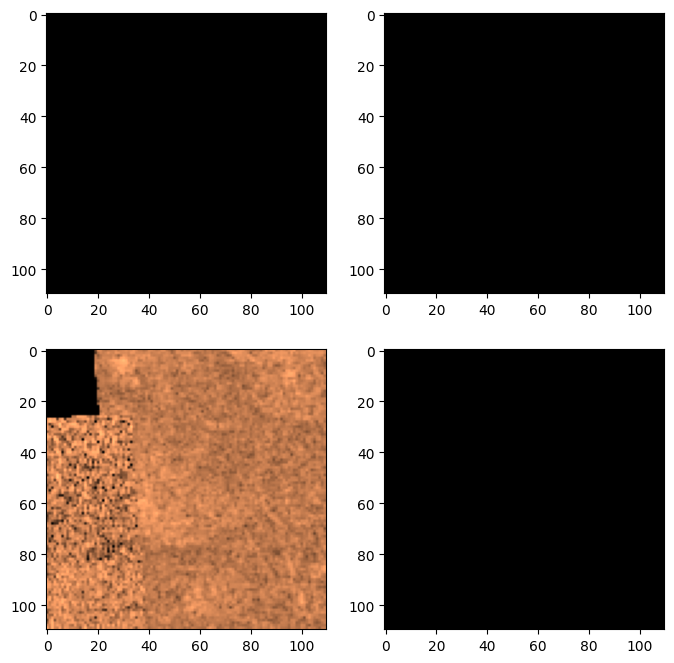

In [149]:
trainCorruptedList = corruptedImages(X_train_copy)

import random
random.shuffle(trainCorruptedList)

f, axarr = plt.subplots(2,2,figsize=(8,8))
for i in range(2):
    for j in range(2):
        axarr[i,j].imshow(X_train_copy[trainCorruptedList[i*2+j]], cmap="copper")

In [150]:
import os
print(os.listdir(path))

X_train = pd.read_csv(os.path.join(path, 'volcanoes_train', 'train_images.csv'))
y_train = pd.read_csv(os.path.join(path, 'volcanoes_train', 'train_labels.csv'))
X_test = pd.read_csv(os.path.join(path, 'volcanoes_test', 'test_images.csv'))
y_test = pd.read_csv(os.path.join(path, 'volcanoes_test', 'test_labels.csv'))

# Fix the column names
XFix(X_train)
XFix(X_test)

def deleteCorrupted(X, y, corruptedIndexList):
    for i in corruptedIndexList:
        X.drop(i, inplace=True) # Drop the corrupted
        y.drop(i, inplace=True) 
    
    X.reset_index(inplace=True) # Reconstruct the index
    X.drop(['index'], axis=1, inplace=True) # Delete old index column
    #Because they are pandas.series we don't need to deal with index
    #Because we use inplace=True we don't need to return something
    
trainCorruptedList = corruptedImages(X_train)
testCorruptedList = corruptedImages(X_test)

deleteCorrupted(X_train, y_train, trainCorruptedList)
deleteCorrupted(X_test, y_test, testCorruptedList)

['Volcanoes_train', 'Volcanoes_test']


In [151]:
print("X_train:\t",X_train.shape,"\ny_train:\t",y_train.shape,"\nX_test:\t\t",X_test.shape,"\ny_test:\t\t",y_test.shape)

X_train:	 (6791, 12100) 
y_train:	 (6791, 4) 
X_test:		 (2655, 12100) 
y_test:		 (2655, 4)


In [152]:
# Get our label
y_train = y_train["Volcano?"]
y_test = y_test["Volcano?"]

# Normalize
X_train = X_train / 255.0
X_test = X_test / 255.0

# One Hot Label encoding
y_train = to_categorical(y_train, num_classes = 2)
y_test = to_categorical(y_test, num_classes = 2)

# Spliting
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.5, random_state=22)

# Lastly resizing
X_test = np.resize(X_test, (X_test.shape[0], 110, 110, 1))
X_train = np.resize(X_train, (X_train.shape[0], 110, 110, 1))
X_val = np.resize(X_val, (X_val.shape[0], 110, 110, 1))

In [153]:
print("%70\tX_train ->",X_train.shape,"\n\ty_train ->",y_train.shape,
      "\n\n%15\tX_test ->",X_test.shape,"\n\ty_test ->",y_test.shape,
      "\n\n%15\tX_val ->",X_val.shape,"\n\ty_val ->",y_val.shape)

%70	X_train -> (6791, 110, 110, 1) 
	y_train -> (6791, 2) 

%15	X_test -> (1327, 110, 110, 1) 
	y_test -> (1327, 2) 

%15	X_val -> (1328, 110, 110, 1) 
	y_val -> (1328, 2)


In [154]:
modelB = Sequential()
modelB.add(Conv2D(filters = 8, kernel_size = (5,5),padding = 'same',activation ='relu', input_shape = (110,110,1)))
modelB.add(MaxPool2D(pool_size=(2,2)))
modelB.add(Dropout(0.5))
modelB.add(Conv2D(filters = 16, kernel_size = (3,3),padding = 'same',activation ='relu'))
modelB.add(MaxPool2D(pool_size=(2,2)))
modelB.add(Dropout(0.5))
modelB.add(Flatten())
modelB.add(Dense(y_train.shape[1], activation = "sigmoid"))

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [155]:
modelB.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 110, 110, 8)    │           208 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 55, 55, 8)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 55, 55, 8)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 55, 55, 16)     │         1,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 27, 27, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 27, 27, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 11664)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 2)              │        23,330 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 24,706 (96.51 KB)

 Trainable params: 24,706 (96.51 KB)

 Non-trainable params: 0 (0.00 B)

In [156]:
modelB.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
modelB_trained = modelB.fit(X_train, y_train, batch_size=64, epochs = 10, validation_data = (X_val,y_val))

Epoch 1/10
107/107 ━━━━━━━━━━━━━━━━━━━━ 19s 160ms/step - accuracy: 0.8393 - loss: 0.4721 - val_accuracy: 0.8245 - val_loss: 0.5565
Epoch 2/10
107/107 ━━━━━━━━━━━━━━━━━━━━ 18s 167ms/step - accuracy: 0.8465 - loss: 0.4311 - val_accuracy: 0.8245 - val_loss: 0.5897
Epoch 3/10
107/107 ━━━━━━━━━━━━━━━━━━━━ 18s 169ms/step - accuracy: 0.8563 - loss: 0.4060 - val_accuracy: 0.8245 - val_loss: 0.6042
Epoch 4/10
107/107 ━━━━━━━━━━━━━━━━━━━━ 18s 166ms/step - accuracy: 0.8562 - loss: 0.4015 - val_accuracy: 0.8245 - val_loss: 0.5214
Epoch 5/10
107/107 ━━━━━━━━━━━━━━━━━━━━ 21s 193ms/step - accuracy: 0.8506 - loss: 0.3994 - val_accuracy: 0.8268 - val_loss: 0.5041
Epoch 6/10
107/107 ━━━━━━━━━━━━━━━━━━━━ 19s 176ms/step - accuracy: 0.8585 - loss: 0.3645 - val_accuracy: 0.8682 - val_loss: 0.3777
Epoch 7/10
107/107 ━━━━━━━━━━━━━━━━━━━━ 19s 178ms/step - accuracy: 0.8709 - loss: 0.3171 - val_accuracy: 0.8991 - val_loss: 0.3373
Epoch 8/10
107/107 ━━━━━━━━━━━━━━━━━━━━ 20s 187ms/step - accuracy: 0.9038 - loss: 0

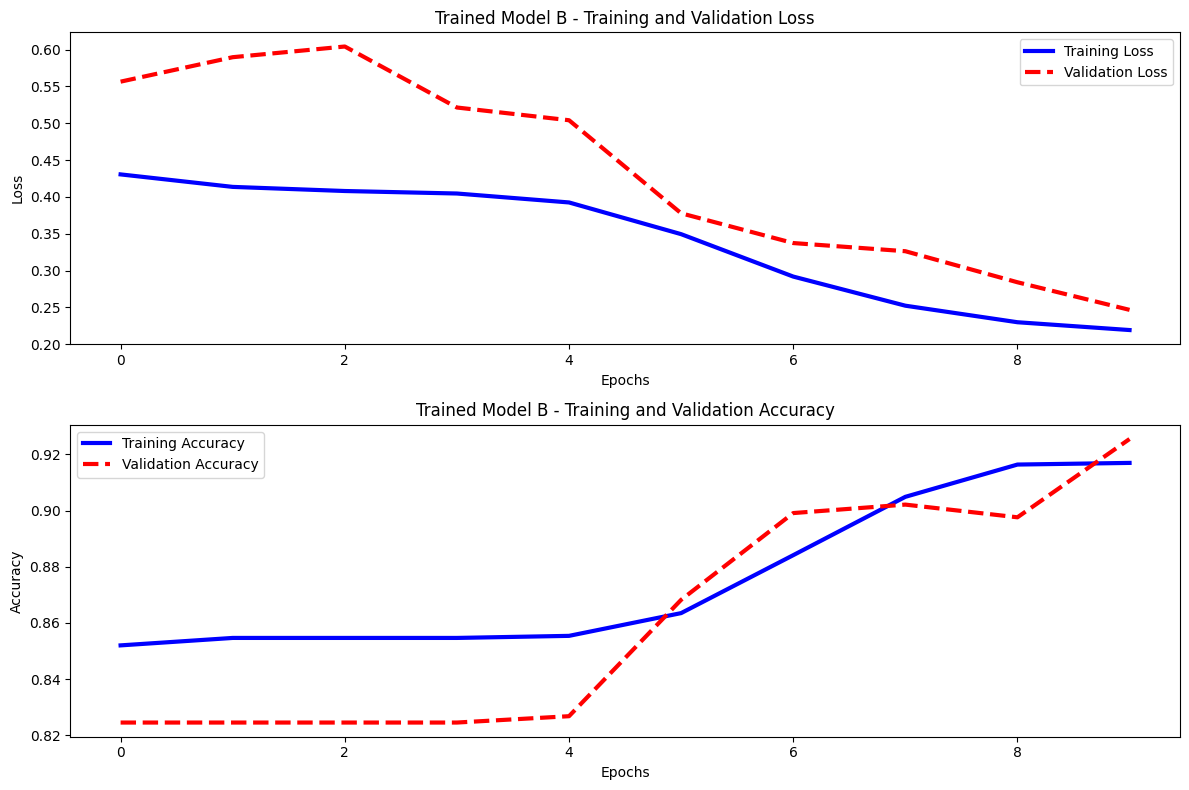

In [157]:
training_results_graph(modelB_trained, 'B')

In [158]:
scoreB = modelB.evaluate(X_test, y_test)
print('Test Loss ->', scoreB[0])
print('Test Accuracy ->', scoreB[1])

42/42 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - accuracy: 0.9249 - loss: 0.2380
Test Loss -> 0.23136383295059204
Test Accuracy -> 0.9306706786155701


Model comparison

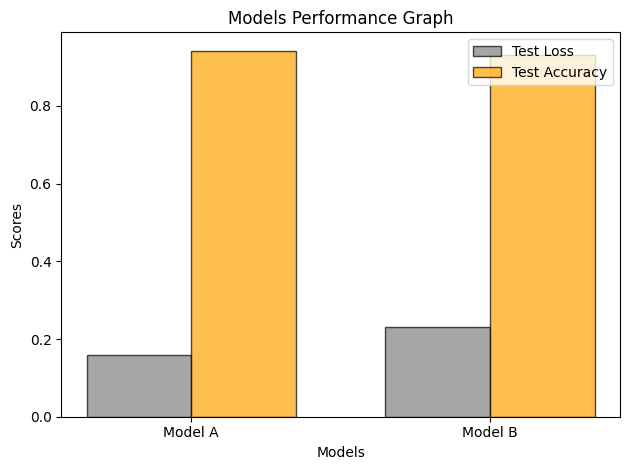

In [159]:
import matplotlib.pyplot as plt
import numpy as np

x = ['Model A', 'Model B']
y = [scoreA[0], scoreB[0]]
y2 = [scoreA[1], scoreB[1]]

# Bar width and positions
bar_width = 0.35
x_positions = np.arange(len(x))

# Create the bar chart
plt.bar(x_positions - bar_width / 2, y, width=bar_width, label='Test Loss', color='grey', edgecolor='black', alpha=0.7)
plt.bar(x_positions + bar_width / 2, y2, width=bar_width, label='Test Accuracy', color='orange', edgecolor='black', alpha=0.7)

# Plot
plt.xticks(x_positions, x)
plt.xlabel('Models')
plt.ylabel('Scores')
plt.title('Models Performance Graph')
plt.legend()
plt.tight_layout()
plt.show()